In [1]:
#Save the datasets in a folder on google drive and mount the drive contents on google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install dmba

In [3]:
!pip install lightgbm

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plot
import warnings
import seaborn as sns
import scipy.stats as scistat
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from dmba import classificationSummary
from lightgbm import LGBMClassifier
from sklearn.tree import export_graphviz 
from sklearn import tree
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

no display found. Using non-interactive Agg backend


In [5]:
vp = pd.read_csv('/content/drive/MyDrive/Voter Persuasion USA/Voter-Persuasion.csv')
vpr = vp.copy() ##We create a copy of the voter persuasion data which will be used for the reversal treatment(MMESSAGE_A_REV)

##### Data Description

In [6]:
vp.head(5) #The first 5 rows in the data

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,CAND1S,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,0,0,4,26,2,59954,79,21,0,0,7,20,64,11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,40,20,2,0,0,0,3997,0,0,1,6,1,1,0,0,1,7,2,1,1,1,11,S,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,0,0,5,10,1,56196,74,22,1,1,16,61,54,14,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,7,2,3,5,7,58950,76,5,11,3,25,50,54,15,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,33,20,80,50,4,1,1,0,4217,0,0,0,1,1,0,0,0,0,1,0,0,1,1,12,S,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,4,0,3,27,4,54809,71,2,2,6,30,35,62,39,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,100,50,5,0,0,0,3434,0,0,0,1,0,0,0,0,0,1,0,0,1,1,15,S,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,0,0,8,6,12,75063,92,4,2,0,24,50,50,19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,100,50,1,0,0,0,1215,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,1,0,N,N,N,N,0,1,T


In [7]:
vp.shape #The data contains 10,000 rows and 79 columns

(10000, 79)

In [8]:
vp.columns #The names of all the columns in the data

Index(['VOTER_ID', 'SET_NO', 'OPP_SEX', 'AGE', 'HH_ND', 'HH_NR', 'HH_NI',
       'MED_AGE', 'NH_WHITE', 'NH_AA', 'NH_ASIAN', 'NH_MULT', 'HISP',
       'COMM_LT10', 'COMM_609P', 'MED_HH_INC', 'COMM_CAR', 'COMM_CP',
       'COMM_PT', 'COMM_WALK', 'KIDS', 'M_MAR', 'F_MAR', 'ED_4COL', 'GENDER_F',
       'GENDER_M', 'H_AFDLN3P', 'H_F1', 'H_M1', 'H_MFDLN3P', 'PARTY_D',
       'PARTY_I', 'PARTY_R', 'VPP_08', 'VPP_12', 'VPR_08', 'VPR_10', 'VPR_12',
       'VG_04', 'VG_06', 'VG_08', 'VG_10', 'VG_12', 'PP_PELIG', 'PR_PELIG',
       'AP_PELIG', 'G_PELIG', 'E_PELIG', 'NL5G', 'NL3PR', 'NL5AP', 'NL2PP',
       'REG_DAYS', 'UPSCALEBUY', 'UPSCALEMAL', 'UPSCALEFEM', 'BOOKBUYERI',
       'FAMILYMAGA', 'FEMALEORIE', 'RELIGIOUSM', 'GARDENINGM', 'CULINARYIN',
       'HEALTHFITN', 'DOITYOURSE', 'FINANCIALM', 'RELIGIOUSC', 'POLITICALC',
       'MEDIANEDUC', 'CAND1S', 'CAND2S', 'MESSAGE_A', 'MESSAGE_A_REV', 'I3',
       'CAND1_UND', 'CAND2_UND', 'MOVED_AD', 'MOVED_A', 'opposite',
       'Partition'],
      dt

In [9]:
vp.isna().sum() #The voter persuation data has no missing values

VOTER_ID         0
SET_NO           0
OPP_SEX          0
AGE              0
HH_ND            0
HH_NR            0
HH_NI            0
MED_AGE          0
NH_WHITE         0
NH_AA            0
NH_ASIAN         0
NH_MULT          0
HISP             0
COMM_LT10        0
COMM_609P        0
MED_HH_INC       0
COMM_CAR         0
COMM_CP          0
COMM_PT          0
COMM_WALK        0
KIDS             0
M_MAR            0
F_MAR            0
ED_4COL          0
GENDER_F         0
GENDER_M         0
H_AFDLN3P        0
H_F1             0
H_M1             0
H_MFDLN3P        0
PARTY_D          0
PARTY_I          0
PARTY_R          0
VPP_08           0
VPP_12           0
VPR_08           0
VPR_10           0
VPR_12           0
VG_04            0
VG_06            0
VG_08            0
VG_10            0
VG_12            0
PP_PELIG         0
PR_PELIG         0
AP_PELIG         0
G_PELIG          0
E_PELIG          0
NL5G             0
NL3PR            0
NL5AP            0
NL2PP            0
REG_DAYS    

In [10]:
vp.info() ##This method shows the range index(the number of entries in the data), 
##the column names, the number of non missing values and the variable type. 
#The voter persuasion data has mostly integer variables. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VOTER_ID       10000 non-null  int64 
 1   SET_NO         10000 non-null  int64 
 2   OPP_SEX        10000 non-null  int64 
 3   AGE            10000 non-null  int64 
 4   HH_ND          10000 non-null  int64 
 5   HH_NR          10000 non-null  int64 
 6   HH_NI          10000 non-null  int64 
 7   MED_AGE        10000 non-null  int64 
 8   NH_WHITE       10000 non-null  int64 
 9   NH_AA          10000 non-null  int64 
 10  NH_ASIAN       10000 non-null  int64 
 11  NH_MULT        10000 non-null  int64 
 12  HISP           10000 non-null  int64 
 13  COMM_LT10      10000 non-null  int64 
 14  COMM_609P      10000 non-null  int64 
 15  MED_HH_INC     10000 non-null  int64 
 16  COMM_CAR       10000 non-null  int64 
 17  COMM_CP        10000 non-null  int64 
 18  COMM_PT        10000 non-nu

In [11]:
vp.MOVED_AD.value_counts() #The target labels are represented in the ratio 1867(Y):3133(N)

N    6266
Y    3734
Name: MOVED_AD, dtype: int64

In [12]:
vp.describe()  #The describe table below shows the summary statistics for each of the numerical variables present in the dataset.

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,MESSAGE_A,MESSAGE_A_REV,MOVED_A,opposite
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,313104.361200,2.005900,0.587400,50.869700,1.211800,0.728700,0.612000,39.161700,66.369000,21.679100,3.574600,1.93680,5.885400,12.952000,7.558700,70160.671600,80.370700,9.101600,3.873300,2.028800,19.238300,51.343400,49.264500,22.640000,0.570400,0.429600,0.006700,0.1163,0.068700,0.039300,0.474300,0.227600,0.285500,0.222000,0.048700,0.157600,0.14770,0.124000,0.510500,0.387000,0.62940,0.502900,0.698300,13.755000,14.891100,14.983000,64.948200,40.541500,2.728100,0.429300,0.700000,0.270700,4172.779300,0.007600,0.014600,0.276500,1.455700,0.617100,0.015100,0.000300,0.030500,0.017300,0.973400,0.045100,0.143800,0.528300,0.53110,12.602800,0.500000,0.500000,0.373400,0.626600
std,183295.514014,0.817883,5.397506,18.151514,1.310005,1.062172,0.927331,6.897558,19.680711,17.922613,3.651434,2.09276,8.232669,8.143435,4.923797,25682.918262,9.936033,5.722775,4.935006,4.439768,6.157476,12.334695,12.571648,12.398636,0.495044,0.495044,0.081583,0.3206,0.252956,0.194317,0.499364,0.419304,0.451675,0.415612,0.215251,0.364384,0.35482,0.329598,0.499915,0.487088,0.48299,0.500017,0.459019,25.983023,28.352623,25.665743,38.913113,28.584356,1.909957,0.818088,1.198476,0.509163,4014.560596,0.116377,0.129571,0.528087,0.965883,0.590188,0.136652,0.017319,0.274913,0.156854,0.676859,0.330571,0.461891,0.514806,0.52121,1.090207,0.500025,0.500025,0.483731,0.483731
min,13.000000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,25.000000,23.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,22381.000000,36.000000,0.000000,0.000000,0.000000,3.000000,15.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,152718.500000,1.000000,0.000000,36.000000,0.000000,0.000000,0.000000,34.000000,58.000000,5.000000,1.000000,1.00000,2.000000,7.000000,4.000000,51797.000000,76.000000,6.000000,1.000000,0.000000,15.000000,44.000000,43.000000,13.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,20.000000,1.000000,0.0

#### Data Preprocessing

In [13]:
vp.drop(['VOTER_ID', 'MOVED_A', 'opposite', 'MESSAGE_A_REV'], axis = 1, inplace = True)
vp['MOVED_AD'] = vp['MOVED_AD'].replace({"N": 0, "Y": 1}) #Change N to 0 and Y to 1

vpr.drop(['VOTER_ID', 'MOVED_A', 'opposite', 'MESSAGE_A'], axis = 1, inplace = True)
vpr['MOVED_AD'] = vpr['MOVED_AD'].replace({"N": 0, "Y": 1}) #Change N to 0 and Y to 1

#### Preliminary Analysis

>*1. MESSAGE_A is the column that shows whether a voter got the flyer or not. 1 represents getting the flyer and 0 represents not getting the flyer*

>*Overall, we calculate how well the flyer did in moving voters in a Democratic direction? (We look at the target variable among those who got the flyer, compared to those who did not.)*

In [14]:
A = len(vp[(vp['MESSAGE_A'] == 1 ) & (vp['MOVED_AD'] == 1)])
B = len(vp)
C= A/B * 100
print('The percentage of voters who got the flyer and moved is: ' + str(round(C, 2)) +'%')

The percentage of voters who got the flyer and moved is: 20.12%


In [15]:
D = len(vp[(vp['MESSAGE_A'] == 0 ) & (vp['MOVED_AD'] == 1)])
E = len(vp)
F= D/E * 100
print('The percentage of voters who did not get the flyer and moved is: ' + str(F)+'%')

The percentage of voters who did not get the flyer and moved is: 17.22%


The flyer did a good job in moving about 20% of the total number of voters who got the flyer as against the 17% who didn't get it and still moved.

#### Exploratory Data Analysis (EDA)

>*2. Exploring the data to learn more about the relationships between the predictor variables and MOVED_AD.We select the predictors that seem to have good predictive potential by showing supporting chart and table.*

Side-by-side boxplots are useful in classification tasks for evaluating the potential of numerical predictors. This is done by using the x-axis for the categorical outcome and the y-axis for a numerical predictor. The first set of  examples shown below helps us to see the effects of SET_NO, OPP_SEX, AGE, HH_ND, HH_NR, HH_NI, MED_AGE, NH_WHITE, NH_AA, NH_ASIAN on MOVED_AD. These pairs do not clearly separate the outcome variable so we will use the correlation plot to select potentially useful variables.

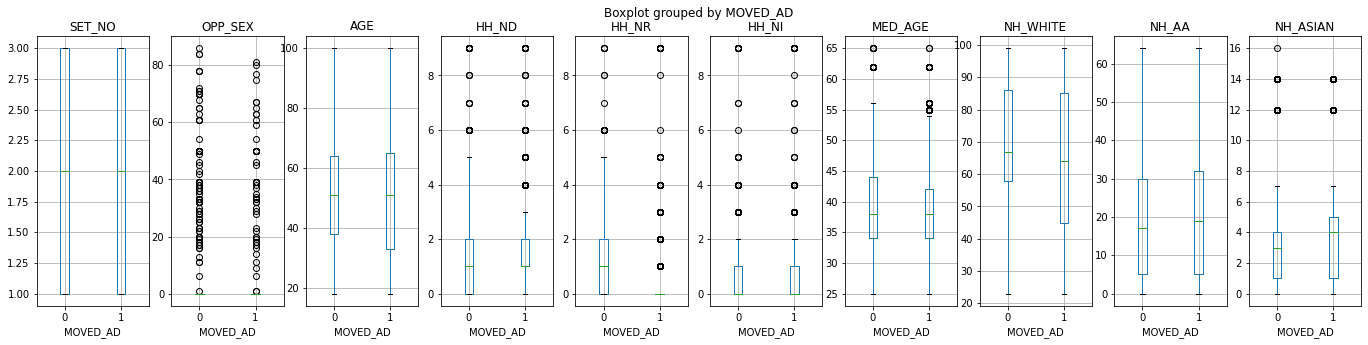

In [16]:
## side-by-side boxplots
fig, axes = plot.subplots(nrows=1, ncols =  10, figsize=(23,5))
vp.boxplot(column = 'SET_NO', by = 'MOVED_AD', ax = axes[0])
vp.boxplot(column = 'OPP_SEX', by = 'MOVED_AD', ax = axes[1])
vp.boxplot(column = 'AGE', by = 'MOVED_AD', ax = axes[2])
vp.boxplot(column = 'HH_ND', by = 'MOVED_AD', ax = axes[3])
vp.boxplot(column = 'HH_NR', by = 'MOVED_AD', ax = axes[4])
vp.boxplot(column = 'HH_NI', by = 'MOVED_AD', ax = axes[5])
vp.boxplot(column = 'MED_AGE', by = 'MOVED_AD', ax = axes[6])
vp.boxplot(column = 'NH_WHITE', by = 'MOVED_AD', ax = axes[7])
vp.boxplot(column = 'NH_AA', by = 'MOVED_AD', ax = axes[8])
vp.boxplot(column = 'NH_ASIAN', by = 'MOVED_AD', ax = axes[9])

for ax in axes:
  ax.set_xlabel('MOVED_AD')

>*We change the datatype of categorical columns and one-hot encode them before getting their correlation values*

In [17]:
cat_cols = ['CAND1S', 'CAND2S', 'I3', 'CAND1_UND', 'CAND2_UND', 'Partition'] ##We create a list of categorical columns
vp[cat_cols] = vp[cat_cols].astype('category')

vp = pd.get_dummies(vp, drop_first = True) #one-hot encode the categorical variables


rcat_cols = ['CAND1S', 'CAND2S', 'I3', 'CAND1_UND', 'CAND2_UND', 'Partition'] #We do the same thing for vpr data
vpr[rcat_cols] = vpr[rcat_cols].astype('category')

vpr = pd.get_dummies(vpr, drop_first = True) 





##### Correlation Analysis & Feature Selection

>*In datasets with a large number of variables (which are likely to serve as predictors), there is usually much overlap in the information covered by the set of variables. One simple way to find redundancies is to look at a correlation matrix. This shows all the pairwise correlations between variables. Pairs that have a very strong(positive or negative) correlation contain a lot of overlap in information and are good candidates for data reduction by removing one of the variables. Removing variables that are strongly correlated to others is useful for avoiding multicollinearity problems that can arise in various models. (Multicollinearity is the presence of two or more predictors sharing the same linear relationship with the outcome variable.*

>*Correlation analysis is also a good method for detecting duplications of variables in the data. Sometimes, the same variables appears accidentally more than once in a dataset(under a different name) because the dataset was merged from multiples sources, the same phenomenon is measured in different units, and so on. Using correlation table, as shown below, can make the task of identifying strong correlations easier.*



In [18]:
vp_corr = vp.corr()
vp_corr

,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,MESSAGE_A,MOVED_AD,CAND1S_S,CAND1S_U,CAND2S_S,CAND2S_U,I3_Y,CAND1_UND_Y,CAND2_UND_Y,Partition_V
SET_NO,1.000000,-0.003911,-0.005876,0.001167,-0.024635,0.009744,0.016761,0.008178,-0.000819,-0.013291,-0.011468,-0.007237,0.006664,-0.007176,-0.004025,0.011594,0.000855,-0.019042,-0.005913,-0.003139,0.014828,0.011754,-0.014387,-0.015723,0.015723,0.003904,-0.008720,0.012059,-0.018450,-0.005383,0.021455,-0.014036,-0.015916,0.004617,-0.012181,-0.014031,-0.003456,-0.006144,-0.021548,-0.006617,-0.010680,-0.014172,-0.011114,-0.012040,-0.011458,-0.016840,-0.018566,-0.014978,-0.012903,-0.013498,-0.011040,-0.009740,-0.005725,0.014287,0.003632,-0.002264,-0.002985,-0.015114,0.006936,0.005871,-0.002355,-0.002426,0.001605,-0.001187,-0.011441,-0.010636,-0.002419,-0.005502,0.005553,-0.014160,0.005984,-0.003954,-0.000957,0.021131,0.005984,-0.000957,0.003759
OPP_SEX,-0.003911,1.000000,0.009523,-0.003552,0.015257,0.002180,0.002029,0.012733,-0.003313,0.009011,0.012043,-0.026152,-0.004011,0.011998,0.014364,0.017762,-0.013530,-0.018776,-0.003819,0.016404,0.022644,0.005899,0.010380,-0.000768,0.000768,0.008550,-0.019370,0.000033,0.019181,-0.008758,-0.000129,0.011444,0.008113,0.013767,-0.003038,0.007385,0.001440,0.003755,0.008398,-0.014543,-0.006857,-0.024293,0.011269,0.000564,0.003595,-0.014082,-0.009582,-0.008186,0.002430,0.006945,0.012442,-0.004772,0.005789,-0.012264,-0.006777,-0.004772,0.003019,-0.012027,-0.001885,-0.012075,-0.012004,-0.000322,-0.010925,0.016420,-0.003176,-0.001304,0.014092,-0.012043,-0.006487,0.018930,-0.009495,0.003711,-0.002232,-0.001862,-0.009495,-0.002232,0.002146
AGE,-0.005876,0.009523,1.000000,-0.111906,-0.030063,-0.092572,0.098188,0.073202,-0.073316,-0.009158,-0.014134,-0.016145,0.092120,-0.072596,0.010759,0.004094,0.027531,-0.079661,-0.000581,-0.060163,0.038758,0.066379,0.018193,0.014716,-0.014716,-0.004138,0.120103,0.040525,-0.071589,0.002052,-0.064169,0.067750,0.258580,0.160350,0.272571,0.270571,0.210487,0.403527,0.419221,0.336513,0.378432,0.245178,0.276011,0.308909,0.316450,0.332840,0.345804,0.455624,0.323560,0.339335,0.278858,0.266400,0.047765,0.063871,0.071326,0.069181,0.051776,0.077682,0.000761,0.076815,0.086079,0.076943,0.098017,0.081000,0.004413,0.018986,0.025479,0.012512,-0.026237,-0.001714,0.065583,-0.008637,0.000736,-0.074026,0.065583,0.000736,0.002166
HH_ND,0.001167,-0.003552,-0.111906,1.000000,-0.280483,-0.074276,-0.083083,-0.169724,0.165693,0.047189,-0.024447,0.026853,-0.119120,0.051022,-0.042685,-0.108384,-0.042078,0.214261,0.088951,0.033727,-0.125144,-0.104730,-0.030464,0.022807,-0.022807,0.081234,-0.185101,-0.161920,0.151165,0.623973,-0.273481,-0.422504,0.098605,-0.178097,0.086153,-0.122389,0.065635,-0.079142,-0.072986,-0.051698,-0.065217,-0.028607,-0.002154,0.017251,0.015423,-0.049271,-0.020544,-0.076350,0.011734,0.010218,0.005196,-0.042373,-0.005311,-0.015863,-0.041147,-0.021512,0.013839,-0.025130,-0.007209,-0.029602,-0.035842,0.008385,-0.036379,-0.056621,0.030113,0.032243,-0.077080,-0.024734,0.259323,-0.363547,0.253566,-0.034837,0.017051,-0.282650,0.253566,0.017051,0.004010
HH_NR,-0.024635,0.015257,-0.030063,-0.280483,1.000000,0.018820,0.037958,0.105956,-0.092937,-0.030224,0.002499,-0.030513,0.089188,-0.016106,0.024356,0.053064,0.041850,-0.150320,-0.028500,-0.007516,0.073881,0.060625,0.006245,-0.055824,0.055824,-0.017107,-0.172241,-0.114502,-0.009875,-0.455207,-0.181781,0.681573,-0.002427,0.262509,-0.030344,0.209029,-0.001025,0.038231,0.051019,0.011026,0.038860,0.016

>*3. Using the correlation table, we focus on the correlation figures of predictors with the target variable(MOVED_AD). We select only the predictors that reduces the effect of multicollinearity and we assume these variables have a good predictive potential:
HH_ND          0.259323; 
HH_NR         -0.279504;
NH_WHITE      -0.096613;
PARTY_R       -0.415191;
VPP_08         0.115435;
UPSCALEMAL    -0.005611;
MESSAGE_A      0.059954;
CAND1S_S      -0.657461;
CAND2S_S      -0.187660;
CAND1_UND_Y    0.366541.*

#### Testing for measures of central tendency, shape and spread among selected predictors

>*The getdistprops function takes a series and generates measures of central tendency, shape, and spread. The function returns a dictionary with these measures. It also handles situations where the Shapiro test for normality does not return a vaule. It will not add keys for normstat and normpvalue when that happens.*

In [19]:
def getdistprops(seriestotest):
  out = {}
  normstat, normpvalue = scistat.shapiro(seriestotest)
  if (not math.isnan(normstat)):
    out['normstat'] = normstat
    if(normpvalue>=0.05):
      out['normpvalue'] = str(round(normpvalue, 2)) + ":Accept Normal"
    elif (normpvalue<0.05):
      out['normpvalue'] = str(round(normpvalue, 2)) + ": Reject Normal"
      out['mean'] = seriestotest.mean()
      out['median'] = seriestotest.median()
      out['std'] = seriestotest.std()
      out['kurtosis'] = seriestotest.kurtosis()
      out['skew'] = seriestotest.skew()
      out['count'] = seriestotest.count()
      return out

In [20]:
dist_hhnd = getdistprops(vp.HH_ND)
print(dist_hhnd)

{'normstat': 0.8152649998664856, 'normpvalue': '0.0: Reject Normal', 'mean': 1.2118, 'median': 1.0, 'std': 1.3100047218378281, 'kurtosis': 4.230567052043606, 'skew': 1.5489573155177165, 'count': 10000}


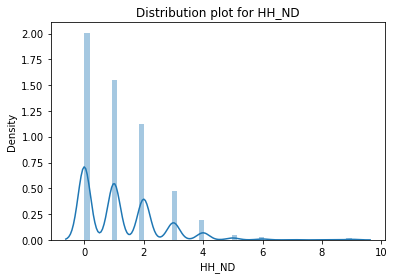

In [21]:
sns.distplot(vp.HH_ND)
plot.title('Distribution plot for HH_ND')
plot.show()

>*For HH_ND, the skew and kurtosis values suggest that its distribution has slightly positive skew and fatter tails than a normally distributed variable. The shapiro test of normality (normpvalue) confirms this. The HH_ND variable has less variability and it is leptokurtic.It is also multimodal i.e having multiple peaks*

In [22]:
dist_nhwhite = getdistprops(vp.NH_WHITE)
print(dist_nhwhite)

{'normstat': 0.9365021586418152, 'normpvalue': '0.0: Reject Normal', 'mean': 66.369, 'median': 65.0, 'std': 19.680710658845847, 'kurtosis': -0.5138927132644593, 'skew': -0.5264778929201961, 'count': 10000}


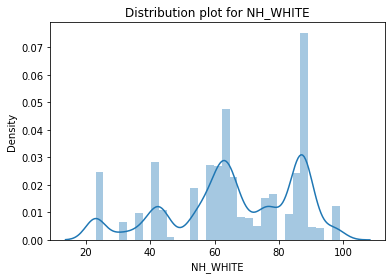

In [23]:
sns.distplot(vp.NH_WHITE)
plot.title('Distribution plot for NH_WHITE')
plot.show()

>*For NH_WHITE, the skew value suggest that its distribution has slightly negative skew. It is flattened, skewed to the left and dispersed. Therefore, can we say that NH_WHITE is platykurtic and multimodal.*

In [24]:
dist_partyr = getdistprops(vp.PARTY_R)
print(dist_partyr)

{'normstat': 0.5659871697425842, 'normpvalue': '0.0: Reject Normal', 'mean': 0.2855, 'median': 0.0, 'std': 0.45167482884826465, 'kurtosis': -1.0977417578466069, 'skew': 0.9499883317774779, 'count': 10000}


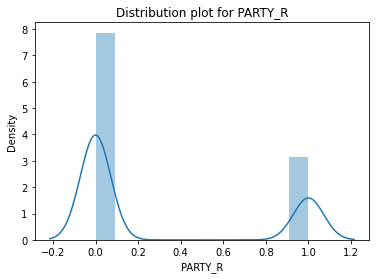

In [25]:
sns.distplot(vp.PARTY_R)
plot.title('Distribution plot for PARTY_R')
plot.show()

>*For PARTY_R, the skew value suggest that its distribution has slightly positive skew. It is flattened, dispersed and bimodal. PARTY_R variable is platykurtic.*

In [26]:
dist_vpp_08 = getdistprops(vp.VPP_08)
print(dist_vpp_08)

{'normstat': 0.5128992199897766, 'normpvalue': '0.0: Reject Normal', 'mean': 0.222, 'median': 0.0, 'std': 0.4156119263535378, 'kurtosis': -0.20965332377490142, 'skew': 1.338054052306817, 'count': 10000}


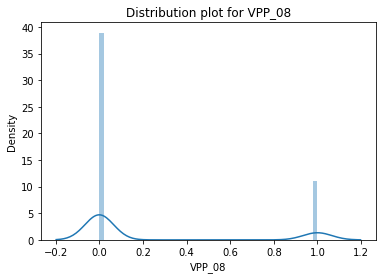

In [27]:
sns.distplot(vp.VPP_08)
plot.title('Distribution plot for VPP_08')
plot.show()

>*For VPP_O8, the skew value suggest that its distribution has slightly positive skew. It is flattened, dispersed and bimodal. VPP_08 variable is platykurtic.*

In [28]:
dist_upscale = getdistprops(vp.UPSCALEMAL)
print(dist_upscale)

{'normstat': 0.08758634328842163, 'normpvalue': '0.0: Reject Normal', 'mean': 0.0146, 'median': 0.0, 'std': 0.12957051690829596, 'kurtosis': 104.03877344221884, 'skew': 9.685088333678225, 'count': 10000}


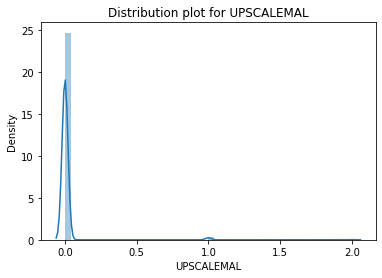

In [29]:
sns.distplot(vp.UPSCALEMAL)
plot.title('Distribution plot for UPSCALEMAL')
plot.show()

>*The skew and kurtosis values suggest that the distribution of UPSCALEMAL has significantly positive skew and fatter tails than a normally distributed variable. It is leptokurtic. The Shapiro test of normality(normpvalue) confirms this.*

In [30]:
dist_mess_a = getdistprops(vp.MESSAGE_A)
print(dist_mess_a)

{'normstat': 0.6366256475448608, 'normpvalue': '0.0: Reject Normal', 'mean': 0.5, 'median': 0.5, 'std': 0.5000250018751562, 'kurtosis': -2.0004001200360104, 'skew': 0.0, 'count': 10000}


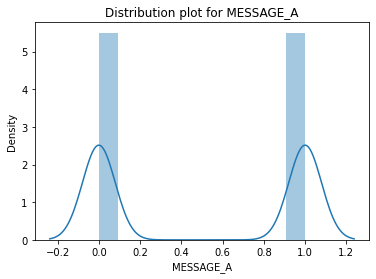

In [31]:
sns.distplot(vp.MESSAGE_A)
plot.title('Distribution plot for MESSAGE_A')
plot.show()

*For MESSAGE_A, the skew value suggest that its distribution is neither positive nor negative. This means that is it perfectly symmetrical. It is flattened, dispersed and bimodal. MEESAGE_A variable is platykurtic.*

In [32]:
dist_cand1s_s = getdistprops(vp.CAND1S_S)
print(dist_cand1s_s)

{'normstat': 0.6345403790473938, 'normpvalue': '0.0: Reject Normal', 'mean': 0.5379, 'median': 1.0, 'std': 0.4985864507233269, 'kurtosis': -1.9772731855780714, 'skew': -0.15206021527985245, 'count': 10000}


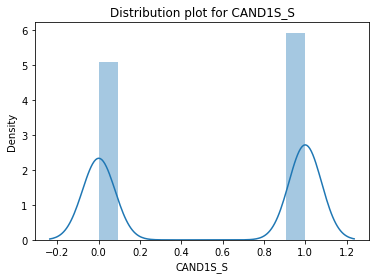

In [33]:
sns.distplot(vp.CAND1S_S)
plot.title('Distribution plot for CAND1S_S')
plot.show()

>*For CAND1S_S, the skew value suggest that its distribution has slightly negative skew. It is flattened, skewed to the left and dispersed. Therefore, can we say that CAND1S_S is platykurtic and bimodal.*

In [34]:
dist_cand2s_s = getdistprops(vp.CAND2S_S)
print(dist_cand2s_s)

{'normstat': 0.4934505224227905, 'normpvalue': '0.0: Reject Normal', 'mean': 0.7968, 'median': 1.0, 'std': 0.4024002393081539, 'kurtosis': 0.17696833462738493, 'skew': -1.4754433167572902, 'count': 10000}


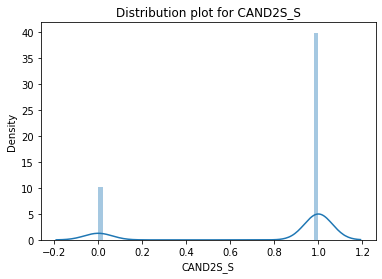

In [35]:
sns.distplot(vp.CAND2S_S)
plot.title('Distribution plot for CAND2S_S')
plot.show()

>*For CAND2S_S, the skew value suggest that its distribution has slightly negative skew. It peaks sharply with fat tails . Therefore, can we say that CAND2S_S is leptokurtic and bimodal and it has less variability.*

In [36]:
dist_cand1_undy = getdistprops(vp.CAND1_UND_Y)
print(dist_cand1_undy)

{'normstat': 0.5292308330535889, 'normpvalue': '0.0: Reject Normal', 'mean': 0.2393, 'median': 0.0, 'std': 0.4266775308960353, 'kurtosis': -0.5062194630271146, 'skew': 1.2222445830812736, 'count': 10000}


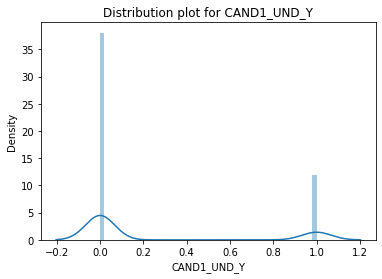

In [37]:
sns.distplot(vp.CAND1_UND_Y)
plot.title('Distribution plot for CAND1_UND_Y')
plot.show()

>*For CAND1_UND_Y, the skew value suggest that its distribution has slightly positive skew. It is flattened and highly dispersed.Therefore, can we say that CAND1_UND_Y is platykurtic and bimodal.*

From the normpvalue obtained and as shown in the distribution plots for each  of the predictor variables selected, it is obvious none of them are normally distributed. However, the algorithms which will be used for modelling which rely on rules like tree based algorithms don't require feature scaling (Standardization and Normalization)

#### Modelling and Judging Classifier Performance

>**We partition the data using the partition variable that is in the dataset. We select only variables with good predictive potential and fit two models accordingly. The performance of the each of the models are evaluated using the confusion matrix and ROC curve. The confusion matrix, also called classification matrix, summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Receiver Operating Characteristic (ROC) curve is a popular chart for assessing the prediction performance of a classfication model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate(FPR) on the X-axis and True Positive Rate (TPR) on the Y-axis.**
> * TPR(Sensitivity) = TP/(TP+FN) 
> * FPR(1-Specificity) = FP/(TN+FP)

In [38]:
variables = ['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL','MESSAGE_A','CAND1S_S','CAND2S_S', 'CAND1_UND_Y']
X = vp[variables]
y = vp['MOVED_AD']

In [39]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1, stratify=y)

In [40]:
# fit a lightgbm classifier (set num_leaves = 3, reg_alpha = 10, reg_lambda = 5)
lgbm_model = LGBMClassifier(num_leaves=3, reg_alpha=10, reg_lambda=5)
lgbm_model.fit(train_X, train_y, eval_set = [(train_X, train_y),(valid_X, valid_y)])

[1]	training's binary_logloss: 0.607794	valid_1's binary_logloss: 0.607985
[2]	training's binary_logloss: 0.564375	valid_1's binary_logloss: 0.564662
[3]	training's binary_logloss: 0.528285	valid_1's binary_logloss: 0.528663
[4]	training's binary_logloss: 0.49799	valid_1's binary_logloss: 0.498457
[5]	training's binary_logloss: 0.472363	valid_1's binary_logloss: 0.472916
[6]	training's binary_logloss: 0.450404	valid_1's binary_logloss: 0.451462
[7]	training's binary_logloss: 0.430904	valid_1's binary_logloss: 0.432032
[8]	training's binary_logloss: 0.414163	valid_1's binary_logloss: 0.415362
[9]	training's binary_logloss: 0.403833	valid_1's binary_logloss: 0.40511
[10]	training's binary_logloss: 0.390583	valid_1's binary_logloss: 0.392257
[11]	training's binary_logloss: 0.383121	valid_1's binary_logloss: 0.38485
[12]	training's binary_logloss: 0.376807	valid_1's binary_logloss: 0.378582
[13]	training's binary_logloss: 0.371461	valid_1's binary_logloss: 0.373276
[14]	training's binary_l

LGBMClassifier(num_leaves=3, reg_alpha=10, reg_lambda=5)

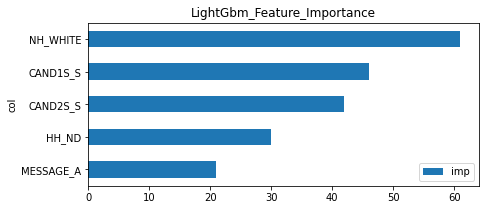

In [41]:
fea_imp = pd.DataFrame({'imp':lgbm_model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-5:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 3))
plot.title('LightGbm_Feature_Importance')
plot.show()

>*For the lightgbm classifier, NH_WHITE is the most important feature for predicting MOVED_AD*

In [42]:
lgbm_model_pred = lgbm_model.predict(valid_X)
lgbm_model_proba = lgbm_model.predict_proba(valid_X)
lgbm_model_proba_1 = lgbm_model_proba[:, 1]

In [43]:
classificationSummary(valid_y, lgbm_model_pred)

Confusion Matrix (Accuracy 0.8755)

       Prediction
Actual    0    1
     0 2163  343
     1  155 1339


In [44]:
valid_y = pd.DataFrame(valid_y)
lgbm_model_proba_1 = pd.DataFrame(lgbm_model_proba_1)

In [45]:
#compute ROC curve and AUC
fpr, tpr, _ = roc_curve(valid_y, lgbm_model_proba_1)
roc_auc = auc(fpr, tpr)

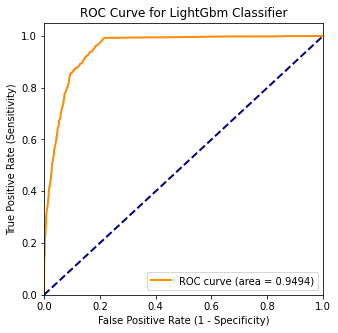

In [46]:
plot.figure(figsize=[5, 5])
lw = 2
plot.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plot.title('ROC Curve for LightGbm Classifier')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate (1 - Specificity)')
plot.ylabel('True Positive Rate (Sensitivity)')
plot.legend(loc="lower right")
plot.show()

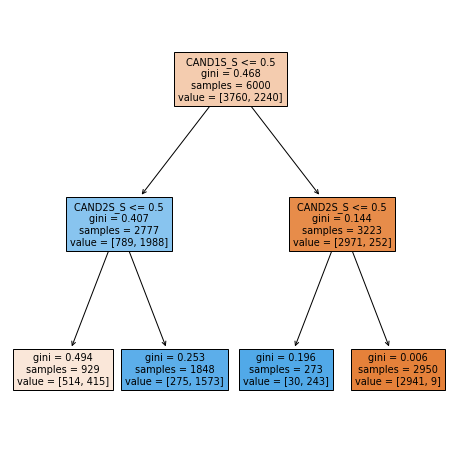

In [47]:
#train model with a decision tree classifier
smallClassTree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plot.figure(figsize = (8,8))
tree.plot_tree(smallClassTree, feature_names=train_X.columns, filled = True)
plot.show()

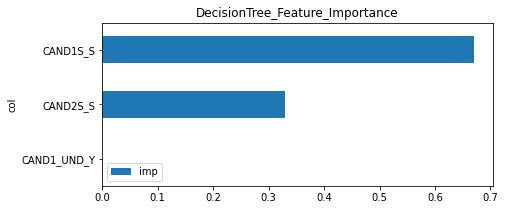

In [48]:
fea_imp = pd.DataFrame({'imp':smallClassTree.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-3:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 3))
plot.title('DecisionTree_Feature_Importance')
plot.show()

>*For the decision tree model, CAND1S_S is the most important feature for predicting MOVED_AD*

In [49]:
tree_pred = smallClassTree.predict(valid_X)
tree_pred_proba = smallClassTree.predict_proba(valid_X)
tree_pred_proba_1 = tree_pred_proba[:,1]

In [50]:
classificationSummary(valid_y, tree_pred)

Confusion Matrix (Accuracy 0.8715)

       Prediction
Actual    0    1
     0 2309  197
     1  317 1177


In [51]:
valid_y = pd.DataFrame(valid_y)
tree_pred_proba_1 = pd.DataFrame(tree_pred_proba_1)

In [52]:
#compute ROC curve and AUC
fpr, tpr, _ = roc_curve(valid_y, tree_pred_proba_1)
roc_auc = auc(fpr, tpr)

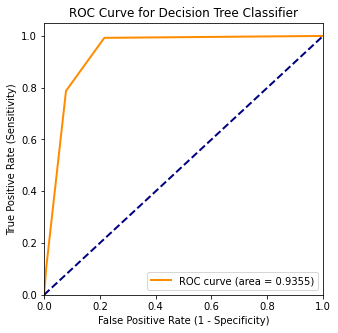

In [53]:
plot.figure(figsize=[5, 5])
lw = 2
plot.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plot.title('ROC Curve for Decision Tree Classifier')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate (1 - Specificity)')
plot.ylabel('True Positive Rate (Sensitivity)')
plot.legend(loc="lower right")
plot.show()

>*4. In terms of predictive power, the best model is the light GBM classifier model. It was chosen because it has the highest AUC score.*

In [54]:
lgbm_model_proba = pd.DataFrame(lgbm_model_proba)

>*5. Using a cut-off of 0.5, we report the propensities for the first three records in the validation set for the lightgbm model.*

In [55]:
lgbm_model_proba.head(3)

,0,1
0,0.968788,0.031212
1,0.972174,0.027826
2,0.192811,0.807189


>*The first record has 3.12% propensity of moving in favour of a democratic candidate. The second record has 2.78% propensity of moving in favour of a democratic candidate. The third record has 80.72% propensity of moving in favour of a democratic candidate.*

>*6. We use a derived variable that is the opposite of Flyer(MESSAGE_A). This is represented as MESSAGE_A_REV in the data. Using the best chosen model, we re-score the validation data using the Flyer-reversed variable as a predictor, instead of Flyer. We report the propensities for the first three records in the validation set*.

In [56]:
rvariables = ['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL','MESSAGE_A_REV','CAND1S_S','CAND2S_S', 'CAND1_UND_Y']

A = vpr[rvariables]
b = vpr['MOVED_AD']

In [57]:
train_A, valid_A, train_b, valid_b = train_test_split(A, b, test_size = 0.4, random_state = 1)

In [58]:
# train model with lightgbm classifier (set num_leaves = 3, reg_alpha = 10, reg_lambda = 5)
rlgbm_model = LGBMClassifier(num_leaves=3, reg_alpha=10, reg_lambda=5)
rlgbm_model.fit(train_A, train_b, eval_set = [(train_A, train_b),(valid_A, valid_b)])

[1]	training's binary_logloss: 0.604351	valid_1's binary_logloss: 0.612913
[2]	training's binary_logloss: 0.56092	valid_1's binary_logloss: 0.569401
[3]	training's binary_logloss: 0.524852	valid_1's binary_logloss: 0.533301
[4]	training's binary_logloss: 0.494596	valid_1's binary_logloss: 0.503045
[5]	training's binary_logloss: 0.469016	valid_1's binary_logloss: 0.477487
[6]	training's binary_logloss: 0.447251	valid_1's binary_logloss: 0.455757
[7]	training's binary_logloss: 0.428175	valid_1's binary_logloss: 0.436477
[8]	training's binary_logloss: 0.411459	valid_1's binary_logloss: 0.419824
[9]	training's binary_logloss: 0.397144	valid_1's binary_logloss: 0.405346
[10]	training's binary_logloss: 0.384028	valid_1's binary_logloss: 0.392304
[11]	training's binary_logloss: 0.376329	valid_1's binary_logloss: 0.384768
[12]	training's binary_logloss: 0.369815	valid_1's binary_logloss: 0.378407
[13]	training's binary_logloss: 0.360029	valid_1's binary_logloss: 0.368717
[14]	training's binary

LGBMClassifier(num_leaves=3, reg_alpha=10, reg_lambda=5)

In [59]:
rlgbm_pred = rlgbm_model.predict(valid_A)
rlgbm_pred_proba = rlgbm_model.predict_proba(valid_A)
rlgbm_pred_proba_1 = rlgbm_pred_proba[:,1]

In [60]:
classificationSummary(valid_b, rlgbm_pred)

Confusion Matrix (Accuracy 0.8785)

       Prediction
Actual    0    1
     0 2128  340
     1  146 1386


In [61]:
valid_b = pd.DataFrame(valid_b)
rlgbm_pred_proba_1 = pd.DataFrame(rlgbm_pred_proba_1)

In [62]:
#compute ROC curve and AUC
fpr, tpr, _ = roc_curve(valid_b, rlgbm_pred_proba_1)
roc_auc = auc(fpr, tpr)

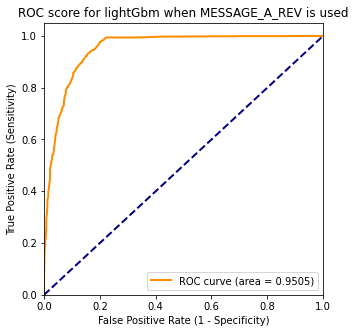

In [63]:
plot.figure(figsize=[5, 5])
lw = 2
plot.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plot.title('ROC score for lightGbm when MESSAGE_A_REV is used')
plot.xlim([0.0, 1.0])
plot.ylim([0.0, 1.05])
plot.xlabel('False Positive Rate (1 - Specificity)')
plot.ylabel('True Positive Rate (Sensitivity)')
plot.legend(loc="lower right")
plot.show()

In [64]:
rlgbm_pred_proba = pd.DataFrame(rlgbm_pred_proba)

In [65]:
rlgbm_pred_proba.head(3)

,0,1
0,0.339899,0.660101
1,0.983439,0.016561
2,0.196165,0.803835


>*The first record has 66% propensity of moving in favour of a democratic candidate. The second record has 1.66% propensity of moving in favour of a democratic candidate. The third record has 80.38% propensity of moving in favour of a democratic candidate.*

>*7. For each record, uplift is computed based on the following difference: P(success | Flyer = 1) - P(success | Flyer = 0).
We compute the uplift for each of the voters in the validation set, and report the uplift for the first three records.*

In [66]:
#We compute the uplift for each of the voters in the validation set, and report the uplift for the first three records
uplift_df = valid_X.copy()  # Need to create a copy to allow modifying data

uplift_df.MESSAGE_A = 1
predTreatment = lgbm_model.predict_proba(uplift_df)
uplift_df.MESSAGE_A = 0
predControl = lgbm_model.predict_proba(uplift_df)

upliftResult_df = pd.DataFrame({
    'probMessage': predTreatment[:,1],
    'probNoMessage': predControl[:,1],
    'uplift': predTreatment[:,1] - predControl[:,1],
    }, index=uplift_df.index)
print(upliftResult_df.head(3))

      probMessage  probNoMessage    uplift
3124     0.031212       0.021237  0.009975
8043     0.040766       0.027826  0.012940
445      0.807189       0.732333  0.074855


The uplift for the first three voters in the validation set are 0.0099, 0.0129 and 0.0749. The message could be sent to all voters with a positive uplift, or, if resources are limited, only to a subset - those with the greatest uplift. Uplift modeling is used mainly in marketing, and more recently, in political campaings. It has two main purposes: 
> * To determine whether to send someone a persuasion message, or just leave them alone.
> * When a message is definitely going to be sent, to determine which message, among several possibilities, to send.

Technically this amounts to the same thing -"send no message" is simply another category of treatment, and an experiment can be constructed with multipe treatments, for example, no message, message A, and message B. However, practitioners tend to think of the two purposes as distinct, and tend to focus on the first. Marketers want to avoid sending discount offers to customers who would make a purchase anyway, or renew subscription anyway. Political campaigns, likewise, want to avoid calling voters who would vote for their candidate in any case. And both parties especially want to avoid sending messages or offers where the effect might be antagonistic - where the uplift is negative.